# Implementando uma Rede Neural Convolucional utilizando Spark para reconhecimento de digitos

A biblioteca *scikit-learn* possui internamente um dataset composto por 1.797 imagens de digitos dos números 0 à 9 com tamanho de 8x8.

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

print("Tamanho das imagens", digits.data.shape)
print("Rótulos das imagens", digits.target.shape)

Tamanho das imagens (1797, 64)
Rótulos das imagens (1797,)


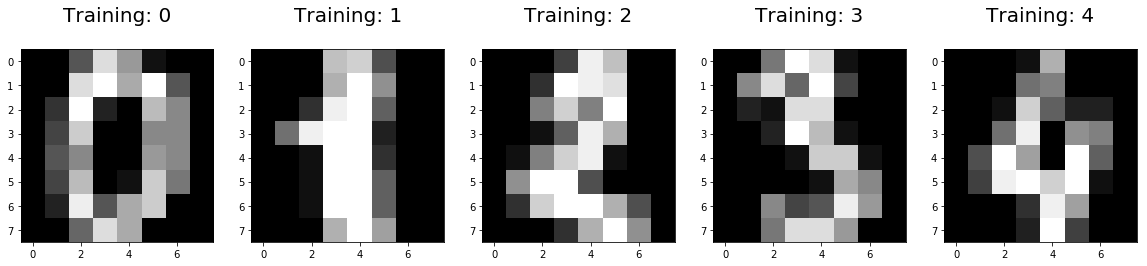

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)
plt.show()

## Representação dos dados

Um dígito é representado por um vetor de 64 posições:

In [3]:
print(digits.data[0])

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


Que também pode ser representado como uma matriz de dimensão 8x8:

In [4]:
print(np.reshape(digits.data[0], (8, 8)))

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


# Rede Neural Convolucional

A Rede Neural Convolucional (do inglês Convolutional Neural Network - CNN) vem ganhando destaque na classificação de imagens. A figura a seguir apresenta um exemplo de arquitetura de CNN:

![Uso da CNN para reconhecimento de digitos](http://parse.ele.tue.nl/cluster/2/CNNArchitecture.jpg)
**Fonte:** Parallel Architecture Research Eindhoven (http://parse.ele.tue.nl/education/cluster2)

O diferencial das CNNs está na camada de convolucional, que aplica a Convolução nos dados de entrada, passa os dados para realizar o Agrupamento (pooling) e sua saída é passada para a próxima camada convolucional até chegar na última camada conhecida como Camada Densa que é normalmente uma MultiLayer Perceptron (MLP).

![Estrutura da CNN](imagens/EstruturaCNN.png)

# Realizando a convolução

In [5]:
en = 8 # tamanho da dimensão da entrada
kn = 3 # tamanho da dimensão do kernel
k = 10 # quantidade de kernels
qtdMatrizes = (en - kn) ** 2
kernels = np.random.randn(k, kn, kn)

# partesDigito = []
# for i in range(0, en - kn):
#     for j in range(0, en - kn):
#         partesDigito.append(digits.data[0].reshape(en, en)[i:i+kn, j:j+kn])
# #         print(i, j)
# #         print(digits.data[0].reshape(en, en)[i:i+kn, j:j+kn])
# print(len(partesDigito))
# print(partesDigito)

def partes(x):
    partesDigito = []
    entrada = np.zeros(((en - kn) ** 2, kn, kn))
    X = x.reshape(en, en) # Muda a entrada vetorial para matriz
    for ki in range(0, k): # Para cada kernel separa a entrada em partes
        index = 0;
        for i in range(0, en - kn): 
            for j in range(0, en - kn):
                entrada[index] = X[i:i+kn, j:j+kn] # Cada parte é uma submatriz da entrada
                index += 1
        partesDigito.append((ki, entrada)) # Para cada kernel gera varias partes da entrada
    return partesDigito

partesDigito = partes(digits.data[0])
print(partesDigito[0])

(0, array([[[  0.,   0.,   5.],
        [  0.,   0.,  13.],
        [  0.,   3.,  15.]],

       [[  0.,   5.,  13.],
        [  0.,  13.,  15.],
        [  3.,  15.,   2.]],

       [[  5.,  13.,   9.],
        [ 13.,  15.,  10.],
        [ 15.,   2.,   0.]],

       [[ 13.,   9.,   1.],
        [ 15.,  10.,  15.],
        [  2.,   0.,  11.]],

       [[  9.,   1.,   0.],
        [ 10.,  15.,   5.],
        [  0.,  11.,   8.]],

       [[  0.,   0.,  13.],
        [  0.,   3.,  15.],
        [  0.,   4.,  12.]],

       [[  0.,  13.,  15.],
        [  3.,  15.,   2.],
        [  4.,  12.,   0.]],

       [[ 13.,  15.,  10.],
        [ 15.,   2.,   0.],
        [ 12.,   0.,   0.]],

       [[ 15.,  10.,  15.],
        [  2.,   0.,  11.],
        [  0.,   0.,   8.]],

       [[ 10.,  15.,   5.],
        [  0.,  11.,   8.],
        [  0.,   8.,   8.]],

       [[  0.,   3.,  15.],
        [  0.,   4.,  12.],
        [  0.,   5.,   8.]],

       [[  3.,  15.,   2.],
        [  4.,  12.,  

Número zero


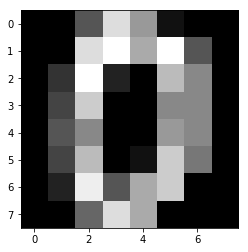

Número zero dividido de acordo com o tamanho do kernel


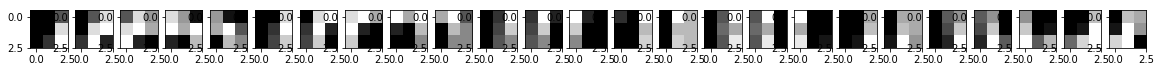

In [6]:
print("Número zero")
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:1], digits.target[0:5])):
  plt.subplot(1, 1, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
plt.show()

print("Número zero dividido de acordo com o tamanho do kernel")
plt.figure(figsize=(20, 4)) 
for index, image in enumerate(partesDigito[0][1]):
  plt.subplot(1, len(partesDigito[0][1]), index + 1)
  plt.imshow(image, cmap=plt.cm.gray)
plt.show()

# Gerando o mapa de ativações

In [7]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

# t representa a dimensão de um mapa de ativação
t = en - kn + 1

# Aplica a função de ativação no resultado da multiplicação do kernel pela entrada
# Recebe como entrada o kernel e uma matriz com as partes da entrada
def ativacao(k, x):
    mapa = np.zeros((t, t)) #Mapa de ativações de um kernel vazio
    for i in range(0, len(x) - 1): #Para cada parte da matriz da entrada
        mapa[int(i/t)][i%t] = sigmoid((x[i] * k).sum())
    return mapa

print("Mapa de ativações de um kernel")
print(ativacao(kernels[0], partesDigito[0][1]))

# print(qtdMatrizes)
# print(partesDigito[0])
# print(len(partesDigito))
# t = en - kn + 1
# mapas = np.zeros((k, t, t))
# for i in range(0, k):
#     mapa = mapas[i]
#     for j in range(0, qtdMatrizes - 1):
#     #     print(int(i/t), i%t)
#         mapa[int(j/t)][j%t] = sigmoid((partesDigito[j] * kernels[i]).sum())
# print(mapas)

Mapa de ativações de um kernel
[[ 0.99998564  0.99999983  0.99999518  1.          1.          0.99999839]
 [ 1.          0.99999999  1.          1.          0.99999951  0.99999995]
 [ 0.99991458  0.99997446  1.          0.99999991  0.99999982  0.98463398]
 [ 0.99995649  0.99999999  0.99999987  1.          0.99908467  0.99998074]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]]


Mapas de ativações dos 10 kernels aplicados na entrada


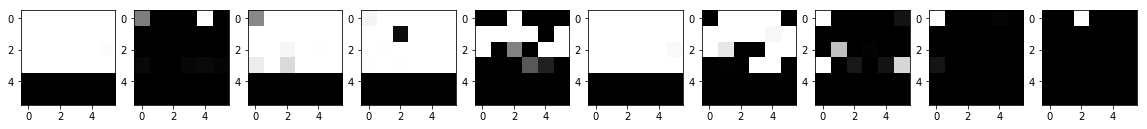

In [8]:
mapas = np.zeros((k, t, t))

for i in range(0, k):
    mapas[i] = ativacao(kernels[partesDigito[i][0]], partesDigito[i][1])

print("Mapas de ativações dos 10 kernels aplicados na entrada")
plt.figure(figsize=(20, 4))
for index, image in enumerate(mapas):
  plt.subplot(1, len(mapas), index + 1)
  plt.imshow(image, cmap=plt.cm.gray)
plt.show()

# Realizando o agrupamento com max pooling

In [9]:
pn = 2 # tamanho do pooling
ps = 2 # tamanho do passo do pooling

# Max Pooling
def maxPooling(x):
    agrupado = np.zeros((int(t / pn), int(t / pn)))
    for i in range(0, int(t / pn)):
        for j in range(0, int(t / pn)):
            agrupado[i][j] = x[i * pn : i * pn + kn - 1, j * pn : j * pn + kn - 1].max()
    return agrupado

pooling = []
for i in range(0, len(mapas)):
    pooling.append(maxPooling(mapas[i]))
    
print(pooling[0])

[[ 1.          1.          1.        ]
 [ 0.99999999  1.          0.99999982]
 [ 0.          0.          0.        ]]


# Criando a camada densa com Multilayer Perceptron

In [10]:
# weights representa os pesos da camada densa (MLP), aqui ainda falta fazer o backpropagation para ajustar esses pesos.
weights = np.random.randn(10, 90)

# Multilayer Perceptron
def mlp(x):
    # A saída corresponde a probabilidade que a entrada tem de ser cada um dos dez números.
    saida = []
    for w in weights:
        # Basicamente adiciona na ordem as probabilidades de 
        saida.append(sigmoid((w * x).sum()))
    return saida

print (mlp(np.asarray(pooling).ravel()))

[0.9905615314189834, 0.19411646750793624, 0.23374639691801555, 0.0013178209873578775, 0.9962387957245186, 0.995195310457966, 0.30593798834976, 0.00019971281366965891, 0.09477953690247157, 0.9998809666387077]


# Montando a Rede Neural Convolucional com o MapReduce

In [12]:
sc = SparkContext.getOrCreate()
# Montando um RDD com todo dataset de digitos
rdd = sc.parallelize(digits.data, 4)
# print(rdd.take(1))

# Cria uma matriz com os kernels (filtros) da primeira camada convolucional
kernels1 = np.random.randn(k, kn, kn)

print(rdd
      # 1º convolucao
      .map(lambda x: partes(x)) # Separa as 25 partes da imagem para cada um dos 10 kernels
      .map(lambda x: list(map(lambda y: ativacao(kernels1[y[0]], y[1]), x))) # Gera o mapa de ativações de cada kernel
      .map(lambda x: list(map(lambda y: maxPooling(y), x))) # Aplica o max pooling na primeira camada
      # Camada Densa (MLP)
      .map(lambda x: np.asarray(x).ravel()) # Converte a matriz de saída da camada convolucional para um vetor 
      .map(lambda x: mlp(x)) # Manda os dados da última camada convolucional agrupada para o MLP
      .take(1))

print("Dado o digito fornecido na entrada, esta saída representa a probabilidade de ser cada um dos números entre zero e nove. TODO - Implementar o backprogation.")
# rdd = rdd.map(lambda x: partes(x)).map(lambda x: list(map(lambda y: ativacao(kernels1[y[0]], y[1]), x))).map(lambda x: list(map(lambda y: maxPooling(y), x))).map(lambda x: np.asarray(x).ravel()).map(lambda x: mlp(x))
# print(rdd.take(1))

[[0.2303787084411721, 0.2099451726892583, 0.06508030989360919, 0.1055256000866959, 0.9971740047740627, 0.09117066280446567, 0.9999356557510007, 1.3844127613072241e-05, 0.8562682290831856, 0.38278995757093703]]
Dado o digito fornecido na entrada, esta saída representa a probabilidade de ser cada um dos números entre zero e nove. TODO - Implementar o backprogation.
